In [50]:
# Import Libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras 

In [51]:
# Define path to test data 
test_path = "../input/forest-fires-classification/Test/Test"

In [52]:
# Initialize tess data pipeline
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(254, 254),
        shuffle = False,
        class_mode='binary',
        batch_size=1)

Found 8617 images belonging to 2 classes.


In [53]:
#Loading the modle from weight files
model = keras.models.load_model('../input/forest-fires-classification/Xception_best.h5')

In [54]:
# Extracting True Labels
true_labels = test_generator.classes

In [55]:
# Making Predictions on Test Data
predictions = model.predict_generator(test_generator, steps=len(true_labels))

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [56]:
# Converting sigmoid function outputs to zeros and ones
pred_list = list(predictions)
pred_labels = [1 if entry > 0.5 else 0 for entry in pred_list]

In [57]:
# Calculating the accuracy scores
print("Best Accyracy attained by model is :",accuracy_score(true_labels,pred_labels))

Best Accyracy attained by model is : 0.8368341650226296


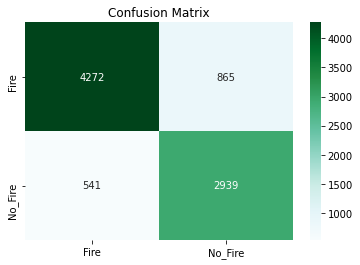

In [58]:
# calculating confusion matrix and plotting heat map of confusion matrix
confu_matrix=confusion_matrix(true_labels,pred_labels)
ax = sns.heatmap(confu_matrix,annot=True,cmap='BuGn', fmt='g',xticklabels=['Fire', 'No_Fire'], yticklabels=['Fire', 'No_Fire']).set_title('Confusion Matrix')
fig = ax.get_figure()
fig.savefig("Final_result.png")

In [59]:
print(classification_report(true_labels,pred_labels))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      5137
           1       0.77      0.84      0.81      3480

    accuracy                           0.84      8617
   macro avg       0.83      0.84      0.83      8617
weighted avg       0.84      0.84      0.84      8617

